- clog는 트랜잭션 상태를 저장.
- pg_database.datfrozenxid가 업데이트되면 PostgreSQL은 불필요한 clog 파일을 제거하려고 시도
- 해당 막힘 페이지도 제거.

- clog 파일 '0002'에 최소 pg_database.datfrozenxid가 포함되어 있으면 해당 파일에 저장된 모든 트랜잭션이 전체 데이터베이스 클러스터에서 고정된 txid로 처리될 수 있으므로 이전 파일('0000' 및 '0001')을 제거할 수 있음.

**Removing unnecessary clog files and pages.**

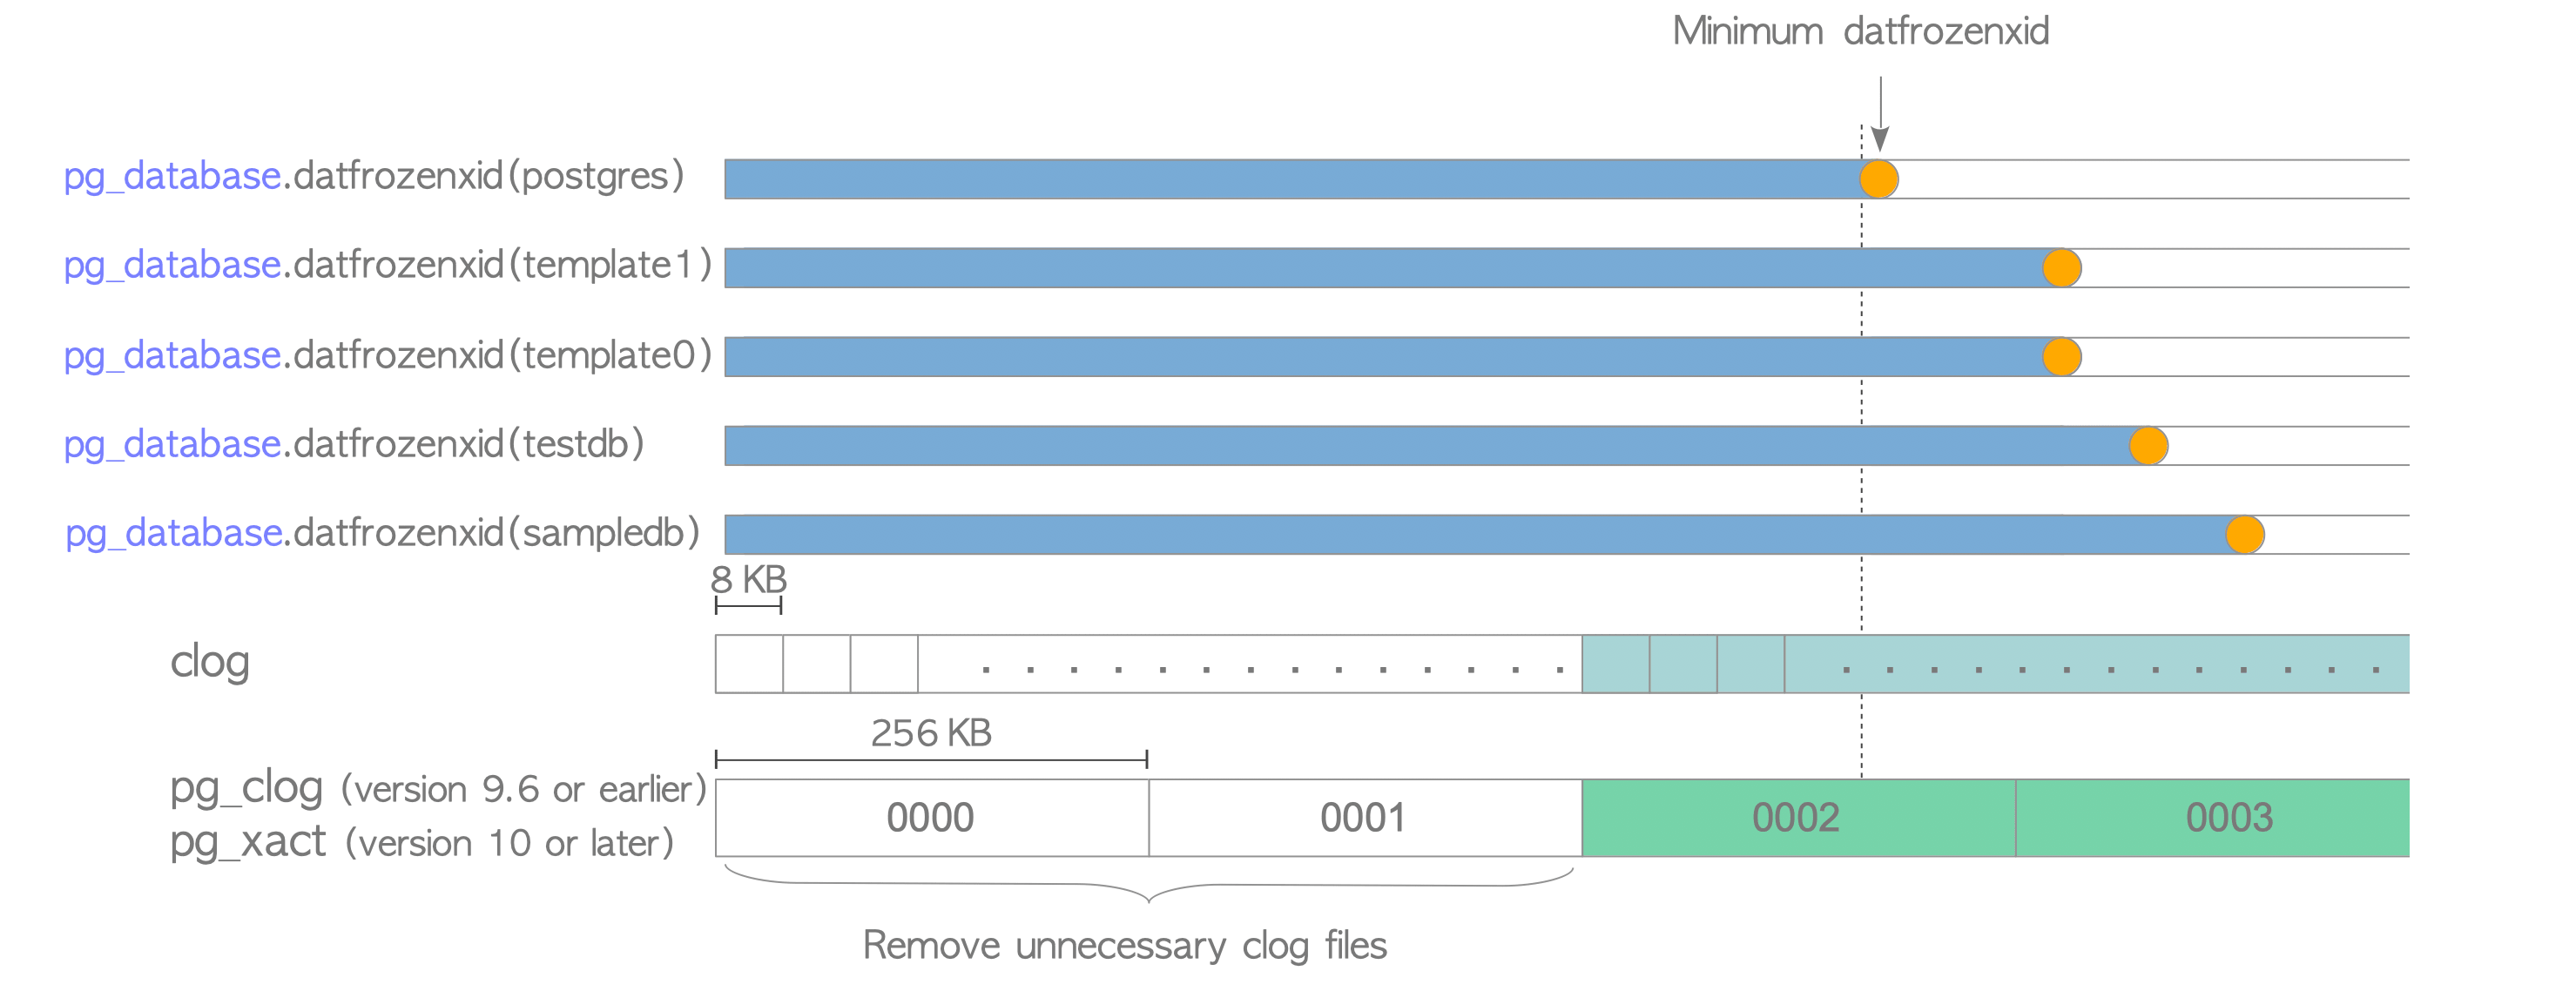

**pg_database.datfrozenxid and the clog file**

- 다음은 pg_database.datfrozenxid 및 clog 파일의 실제 출력


```
$ psql testdb -c "SELECT datname, datfrozenxid FROM pg_database"
  datname  | datfrozenxid
-----------+--------------
 template1 |      7308883
 template0 |      7556347
 postgres  |      7339732
 testdb    |      7506298
(4 rows)

$ ls -la -h data/pg_xact/	# In versions 9.6 or earlier, "ls -la -h data/pg_clog/"
total 316K
drwx------  2 postgres postgres   28 Dec 29 17:15 .
drwx------ 20 postgres postgres 4.0K Dec 29 17:13 ..
-rw-------  1 postgres postgres 256K Dec 29 17:15 0006
-rw-------  1 postgres postgres  56K Dec 29 17:15 0007
```